In [2]:
#import zipfile

#jungle_zip = zipfile.ZipFile('./Архив.zip')
#jungle_zip.extractall('./symbols')

#jungle_zip.close()

In [19]:
import numpy as np
import torch
import json
import cv2
import torchvision
import torchvision.io
import matplotlib.pyplot as plt
import os
import os
import numpy as np
from torch import nn
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch import optim
from torchvision import transforms, utils, models
from collections import OrderedDict
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


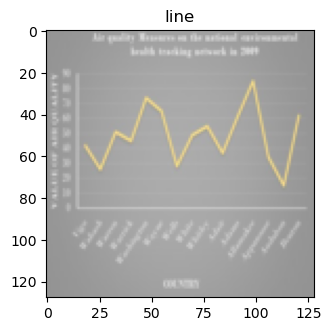

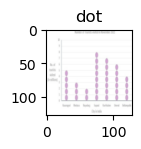

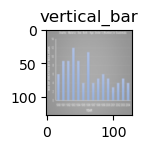

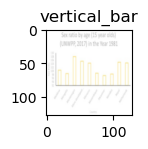

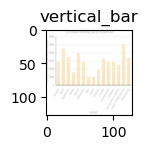

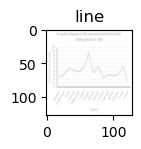

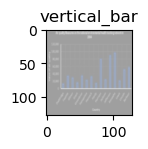

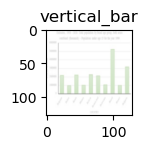

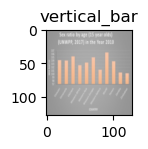

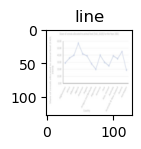

In [25]:
train_transforms = transforms.Compose([
    transforms.Resize((128,128)),
    transforms.ToTensor(),
])
train_data = torchvision.datasets.ImageFolder('./benetech-making-graphs-accessible/chart-types', transform=train_transforms)
train_loader = torch.utils.data.DataLoader(dataset=train_data, batch_size=64, shuffle=True)
def image_convrt(img):
    img = img.clone().cpu().numpy()
    img = img.transpose(1,2,0)
    std = [0.5,0.5,0.5]
    mean = [0.5,0.5,0.5]
    img = img*std + mean
    return img
def plot_10(something):
    #Данные из train
    iter_ = iter(something)
    images, labels = next(iter_)
    an_ = ['dot','horizontal_bar','line','scatter','vertical_bar']
    plt.figure(figsize=(20,10))
    for idx in range(10):
        plt.subplot(2,5,idx+1)
        img = image_convrt((images[idx]))
        label = labels[idx]
        plt.imshow(img)
        plt.title(an_[label.numpy()])
        plt.show()
plot_10(train_loader)

In [4]:
class GraphDataset(torch.utils.data.Dataset):
    def __init__(self) -> None:
        super().__init__()
        
        self.jsons_folder = 'benetech/train/annotations'
        self.images_folder = 'benetech/train/images'
        
        self.jsons = os.listdir(self.jsons_folder)
        self.images = os.listdir(self.images_folder)
        
        self.source = [] #Происхождение графика
        self.chart_type = [] #Тип графика
        self.plot_bb = [] #Нижний правый угол графика(?)
        self.text = [] #Координаты всех текстов на графике и сами тексты
        #(неизвестно правда, почему по несколько x и y)
        self.axes = [] #Координаты цен деления и категорий
        self.data_series = [] #Вероятнее всего координаты точек
        
        #Структура лейбла на примере первого графика
        ##################################################
        f = open(self.jsons_folder + '/' + self.jsons[0])
        
        s = json.load(f)
        #print(s.items())
        keys, values = [], []
        for k,v in s.items():
            keys.append(k)
            values.append(v)
        
        print(keys)
        print(values[0])
        ##################################################
        
        for i in range(len(self.jsons)):
            f = open(self.jsons_folder + '/' + self.jsons[i])
        
            info = list(json.load(f).items())
            
            self.source.append(info[0][1])
            self.chart_type.append(info[1][1])
            self.plot_bb.append(info[2][1])
            self.text.append(info[3][1])
            self.axes.append(info[4][1])
            self.data_series.append(info[5][1])

In [5]:
def rotation(image, grad):    #вращение
    rot_mat = cv2.getRotationMatrix2D((128, 128), grad, 1.0)
    result = cv2.warpAffine(image, rot_mat, (256, 256), flags=cv2.INTER_LINEAR)

class Symbol:
    def __init__(self, s):
        self.img_path=s+'.jpg'
        tens=cv2.imread(path=self.img_path,0)
        augment1=[cv2.resize(tens,(i,i)) for i in range(10,100)]
        self.augment=[]
        for i in augment:
            j=0
            while j<360:
                self.augment.append(rotation(i,j))
                j+=15

    def fire(img,clr):
#        img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        for i in self.augment:
            img = cv2.filter2D(img,i)

SyntaxError: positional argument follows keyword argument (198104998.py, line 8)

In [ ]:
gd = GraphDataset()

In [ ]:
gd.data_series[1]

In [ ]:
image = cv2.imread("symbols/0.jpg")
print(image.shape)

(50, 50, 3)


In [26]:
from tqdm import tqdm
#test_data = torchvision.datasets.ImageFolder(data_dir+'/simpsons_test')
#test_loader = torch.utils.data.DataLoader(dataset=test_data, batch_size=64)
os.system("TORCH_USE_CUDA_DSA=1")
model = torchvision.models.resnet18(pretrained=True).to(device)
print(model)
model.fc = torch.nn.Linear(512,42).to(device)

for param in model.parameters():
    param.requires_grad = False
for param in model.fc.parameters():
    param.requires_grad = True

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

train_loss = []
val_loss = []
train_acc = []
val_acc = []

epochs = 10

for epoch in range(epochs):
    print("epoch {}/{}".format(epoch+1,epochs))
    running_loss = 0.0
    running_score = 0.0
    for i, somedata in tqdm(enumerate(train_loader)):
        image = somedata[0].to(device)
        label = somedata[1].to(device)
        optimizer.zero_grad()
        y_pred = model.forward(image)
        loss = criterion(y_pred,label)
        loss.backward()
        optimizer.step()
        val, index_ = torch.max(y_pred,axis=1)
        running_score += torch.sum(index_ == label.data).item()
        running_loss += loss.item()
    
    epochs_score = running_score/len(train_loader.dataset)
    epochs_loss = running_loss/len(train_loader.dataset)
    train_loss.append(epochs_loss)
    train_acc.append(epochs_score)
    print('Training loss: {}, accuracy: {}'.format(epochs_loss,epochs_score))



ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

947it [01:55,  8.22it/s]


Training loss: 0.002167290716307721, accuracy: 0.9639638152464591
epoch 2/10


947it [01:45,  9.00it/s]


Training loss: 0.0007599375650304877, accuracy: 0.9860510416322757
epoch 3/10


947it [01:45,  8.98it/s]


Training loss: 0.0006194548527093184, accuracy: 0.9881144970121166
epoch 4/10


947it [01:45,  8.97it/s]


Training loss: 0.0005709747270350086, accuracy: 0.9887748027336657
epoch 5/10


947it [01:44,  9.11it/s]


Training loss: 0.0005320281969150858, accuracy: 0.9894020931691373
epoch 6/10


947it [01:46,  8.92it/s]


Training loss: 0.0005201644145355617, accuracy: 0.9897982766020668
epoch 7/10


947it [01:46,  8.88it/s]


Training loss: 0.0005053347044465745, accuracy: 0.9899303377463766
epoch 8/10


947it [01:45,  8.95it/s]


Training loss: 0.0004696400071663979, accuracy: 0.9906071511109644
epoch 9/10


947it [01:44,  9.07it/s]


Training loss: 0.0004553993664042863, accuracy: 0.9905906434679257
epoch 10/10


947it [01:47,  8.84it/s]

Training loss: 0.00046454595979255307, accuracy: 0.9906731816831192


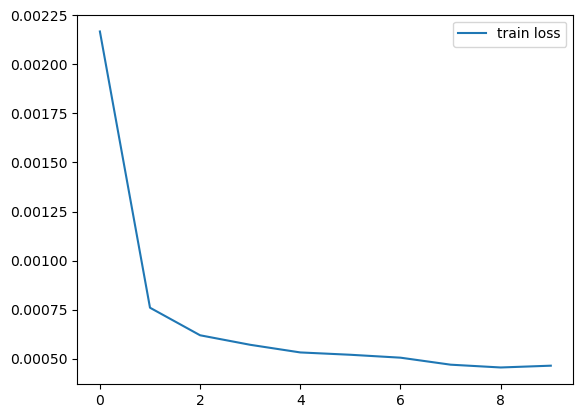

In [27]:
plt.plot(train_loss,label='train loss')
#plt.plot(val_loss,label='test loss')
plt.legend()
plt.show()

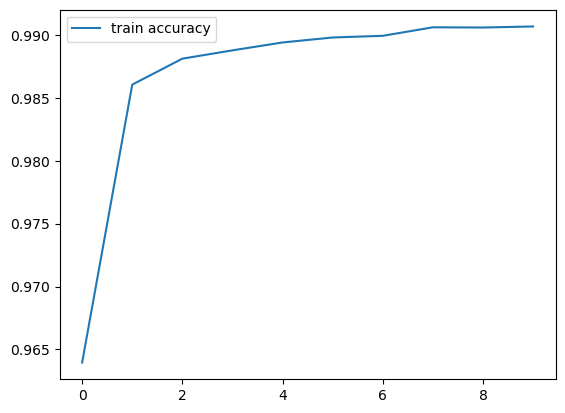

In [28]:
plt.plot(train_acc,label='train accuracy')
#plt.plot(val_acc,label='test accuracy')
plt.legend()
plt.show()